In [1]:
import pandas as pd
import joblib

df = pd.read_csv("final_dataset_v4.csv")
df

,date,hour_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,region_id_16,region_id_17,region_id_18,region_id_19,region_id_20,region_id_21,region_id_22,region_id_23,region_id_24,region_id_25
0,2022-02-25,00:00:00,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-02-25,01:00:00,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-02-25,02:00:00,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-02-25,03:00:00,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-02-25,04:00:00,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141372,2022-11-14,14:00:00,7.0,3.8,4.8,4.1,95.4,0.0,0.00,59.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
141373,2022-11-14,15:00:00,7.0,3.8,4.8,4.1,95.4,0.0,0.00,59.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
141374,2022-11-14,16:00:00,7.0,3.8,4.8,4.1,95.4,0.0,0.00,59.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
141375,2022-11-14,17:00:00,7.0,3.8,4.8,4.1,95.4,0.0,0.00,59.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df.drop(["date", "hour_datetime", "is_alarm"], axis=1, inplace=True)

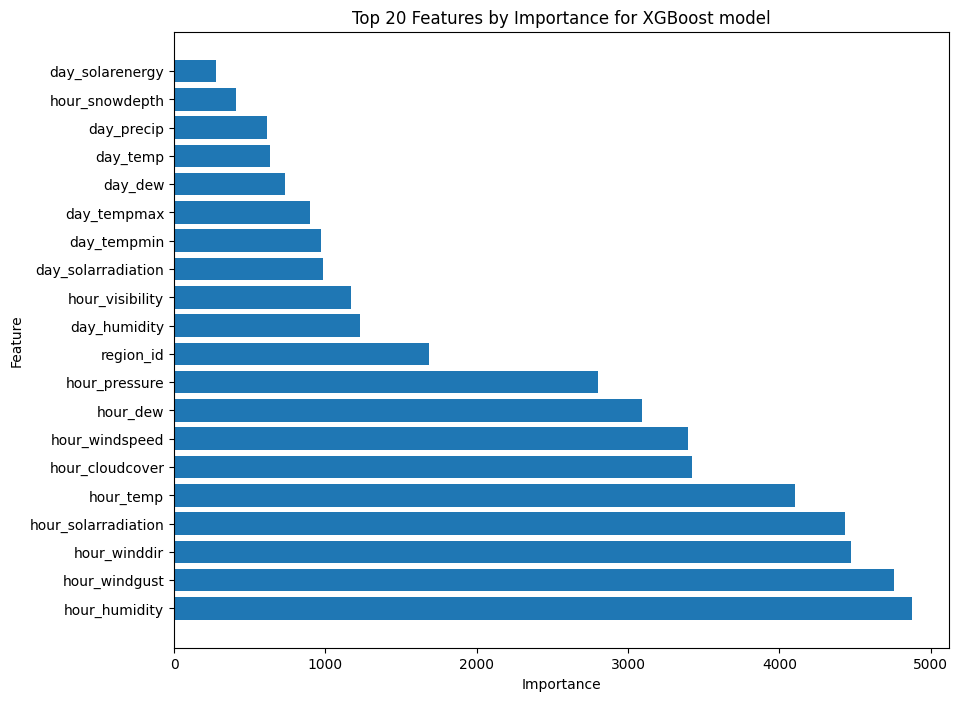

In [3]:
import matplotlib.pyplot as plt

xgboost = joblib.load("XGBoost_model_v3 (2).pkl")

importance_dict = xgboost.get_booster().get_score(importance_type='weight')
feature_importance = pd.DataFrame(importance_dict.items(), columns=['feature', 'importance'])

top_features_xgb = feature_importance.nlargest(20, 'importance')

plt.figure(figsize=(10, 8))
plt.barh(top_features_xgb['feature'], top_features_xgb['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance for XGBoost model')
plt.show()

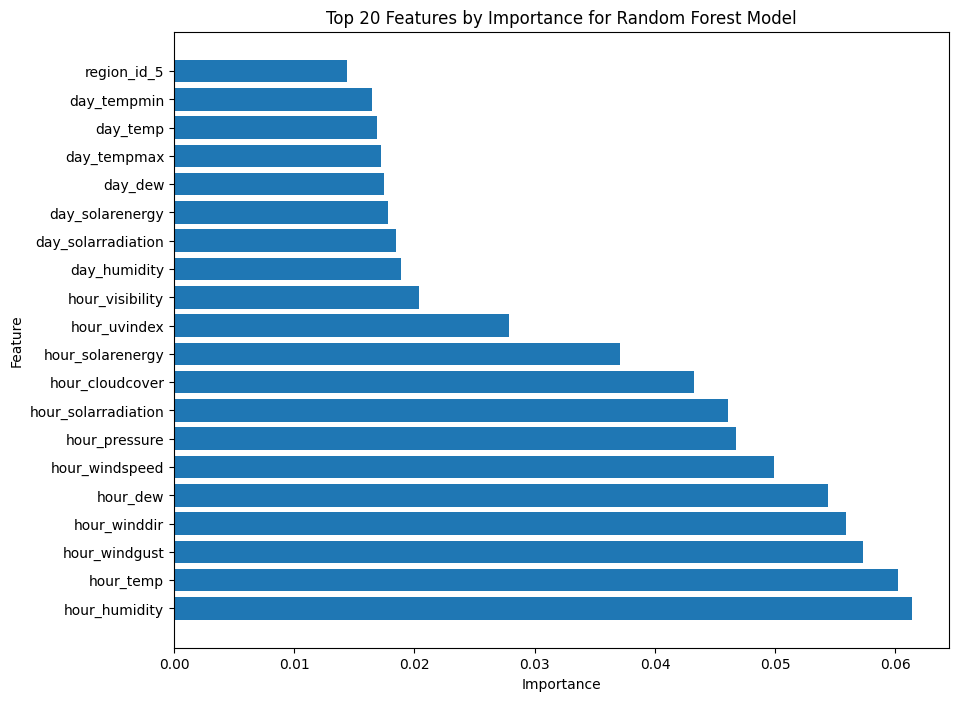

In [5]:
fpipeline = joblib.load("random_forest_model.pkl")
random_forest = fpipeline.named_steps['clf']
feature_importances = random_forest.feature_importances_
feature_names = df.columns.tolist()
feature_importances_df = pd.DataFrame({"feature": feature_names, "importance": feature_importances})
top_features = feature_importances_df.nlargest(20, "importance")

plt.figure(figsize=(10, 8))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance for Random Forest Model')
plt.show()

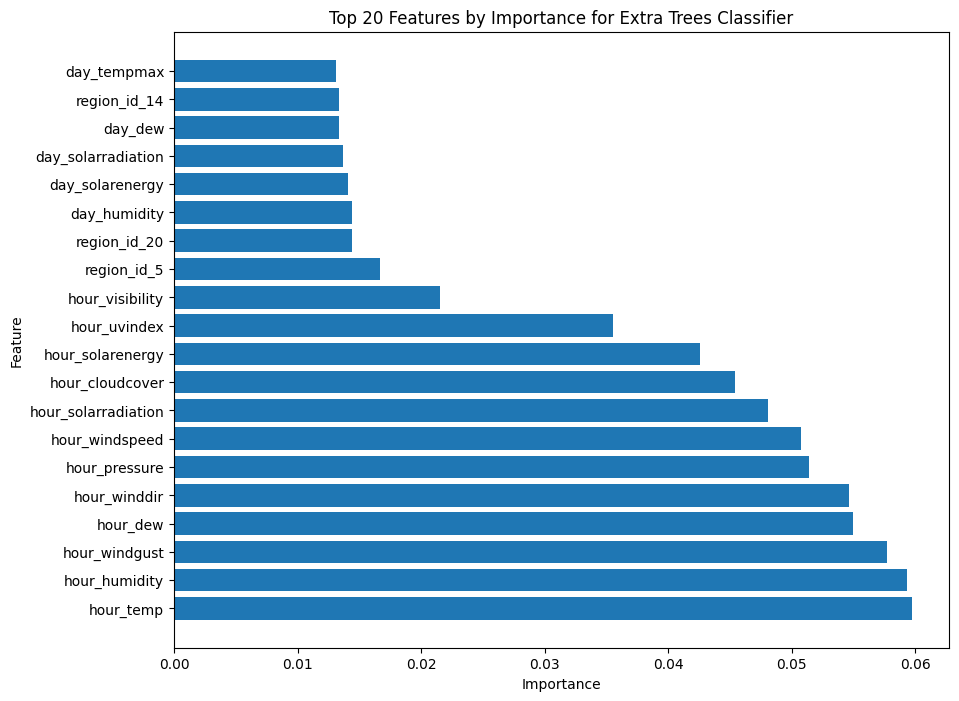

In [6]:
etc = joblib.load("extra_trees_classifier_model.pkl")

feature_importances_etc = pd.DataFrame({"feature": df.columns, "importance": etc.feature_importances_})

top_features_etc = feature_importances_etc.nlargest(20, "importance")

plt.figure(figsize=(10, 8))
plt.barh(top_features_etc['feature'], top_features_etc['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance for Extra Trees Classifier')
plt.show()